# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
%matplotlib inline

# Load the data

In [2]:
df = pd.read_csv("C:\\Users\Swaroop\Desktop\Data_Projects\winequality-red.csv")
print("Data read into dataframe!")

Data read into dataframe!


# Initial Analysis

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Check the shape of data

In [4]:
df.shape

(1599, 12)

### Check the column headings

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Check if database consists any missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

### Statistical Information

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Find the correlation of features

In [9]:
df.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

### Visualization using Histograms

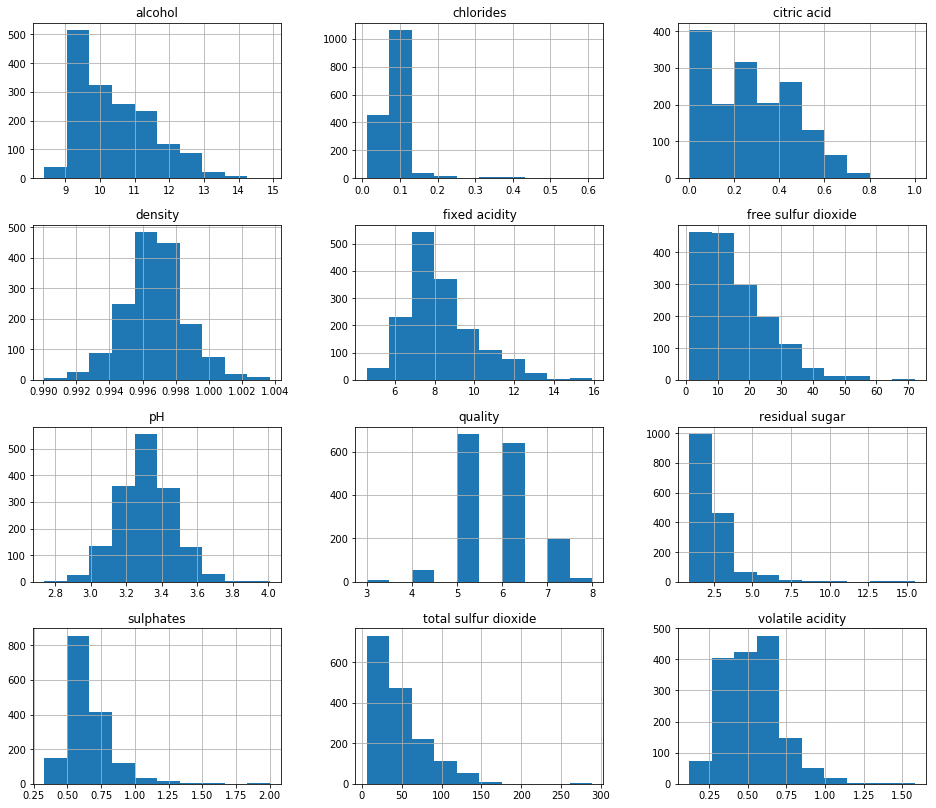

In [10]:
df.hist(figsize = (16,14))
plt.show()

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Feature Creation

### Create a new feature Quality_cat with values B = Bad and G = Good. The threshold value used to classify the quality is 6.

In [12]:
limits = [2,6,9]
labels = ["B","G"]
df['quality_cat'] = pd.cut(df['quality'], bins = limits, labels = labels)
df["quality_cat"].head(5)

0    B
1    B
2    B
3    B
4    B
Name: quality_cat, dtype: category
Categories (2, object): [B < G]

In [13]:
df["quality_cat"].value_counts()

B    1382
G     217
Name: quality_cat, dtype: int64

### Visualization of values of new features

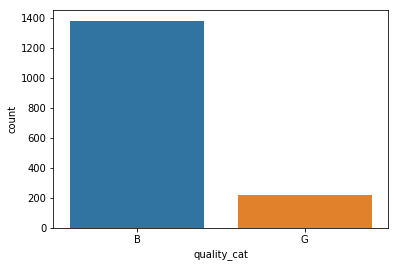

In [14]:
sns.countplot(df['quality_cat'])

# Machine Learning

In [15]:
X = df.drop(["quality","quality_cat"],axis = 1)
y = df["quality_cat"]

### Divide data into test and train set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


### Scale the data

In [17]:
sdc = StandardScaler()
X_train = sdc.fit_transform(X_train)
X_test = sdc.fit_transform(X_test)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


## Decision Tree Classifier

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

### Confusion matrix and Accuracy score

In [20]:
dt_confusion_matrix = confusion_matrix(y_test,dt_pred )
dt_accuracy_score = accuracy_score(y_test, dt_pred)
print(dt_confusion_matrix)
print(dt_accuracy_score*100)

[[247  26]
 [ 25  22]]
84.0625


### Classification Report

In [21]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           B       0.91      0.90      0.91       273
           G       0.46      0.47      0.46        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.68      0.69      0.68       320
weighted avg       0.84      0.84      0.84       320



### Use GridSearchCV to tune the hyperparameters

In [22]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

tree = GridSearchCV(dt, param_grid, scoring='accuracy', cv=10)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTree: Area under the ROC curve = 0.8440495674538229


### Best Parameters and Best Score

In [23]:
print(tree.best_params_)
print(tree.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.893666927286943


### Retrain model using Best Parameters

In [24]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt.fit(X_train,y_train)
dt_pred_gcv = dt.predict(X_test)

### Confusion Matrix and Accuracy Score after Hyperparameter Tuning

In [25]:
dt_confusion_matrix = confusion_matrix(y_test, dt_pred_gcv)
dt_accuracy_score = accuracy_score(y_test, dt_pred_gcv)
print(dt_confusion_matrix)
print(dt_accuracy_score*100)

[[264   9]
 [ 37  10]]
85.625


### Classification Report after Grid Search

In [26]:
print(classification_report(y_test, dt_pred_gcv))

              precision    recall  f1-score   support

           B       0.88      0.97      0.92       273
           G       0.53      0.21      0.30        47

   micro avg       0.86      0.86      0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

### Confusion matrix and Accuracy score

In [28]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[263  10]
 [ 29  18]]
87.8125


### Classification Report

In [29]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           B       0.90      0.96      0.93       273
           G       0.64      0.38      0.48        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



### Use GridSearchCV to tune the hyperparameters

In [30]:
param_grid = { 'n_estimators': [100,200,300,400],'max_features': ['auto', 'sqrt', 'log2']}

forest = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)

forest.fit(X_train, y_train)
forest_preds = forest.predict_proba(X_test)[:, 1]
forest_performance = roc_auc_score(y_test, forest_preds)

print ('RandomForest: Area under the ROC curve = {}'.format(forest_performance))

RandomForest: Area under the ROC curve = 0.9292728548047696


### Best Parameters and Best Score

In [31]:
print(forest.best_params_)
print(forest.best_score_)

{'max_features': 'auto', 'n_estimators': 200}
0.9053948397185301


### Retrain model using Best Parameters

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=400, oob_score = True)
rf.fit(X_train, y_train)
rf_predict_gcv=rf.predict(X_test)

### Confusion Matrix and Accuracy Score after Hyperparameter Tuning

In [33]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict_gcv)
rf_acc_score = accuracy_score(y_test, rf_predict_gcv)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[263  10]
 [ 28  19]]
88.125


### Classification Report after Grid Search

In [34]:
print(classification_report(y_test, rf_predict_gcv))

              precision    recall  f1-score   support

           B       0.90      0.96      0.93       273
           G       0.66      0.40      0.50        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320



In [39]:
Data1 = {'Decision Tree Accuracy':  ['85.31', '85.625'],
        'Random Forest Accuracy': ['87.8125', '88.125'],'GridSearch':["No","Yes"]}

tab = pd.DataFrame (Data1, columns = ['Decision Tree Accuracy','Random Forest Accuracy','GridSearch'])
tab.set_index("GridSearch",inplace = True)
tab

,Decision Tree Accuracy,Random Forest Accuracy
GridSearch,,
No,85.31,87.8125
Yes,85.625,88.125
